# Machine Learning - Assignment 1

## Naive Bayes Learning algorithm, Cross-validation, and ROC-Curves


The aim of the assignment is to implement:

- Naive Bayes learning algorithm for binary classification tasks
- Visualization to plot a ROC-curve
- A cross-validation test
- Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.


## Assignment preparations


We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.


In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [490]:
file_path = 'iris.csv'
data = pd.read_csv(file_path).to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr
iris_setosa, iris_versicolor, iris_virginica = np.split(data, index[1:])

print(f"Full data array (features and labels):\n{iris_setosa[:3]}\n")
print("###############\n")
print(f"Train features (first 4 columns):\n{iris_setosa[:3, :-1]}\n")
print(f"Labels (last column):\n{iris_setosa[:3, -1:]}\n")
print(f"Names of labels:\n{[[numb, name] for numb, name in enumerate(mapped)]}")

Full data array (features and labels):
[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]]

###############

Train features (first 4 columns):
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Labels (last column):
[[0]
 [0]
 [0]]

Names of labels:
[[0, 'Iris-setosa'], [1, 'Iris-versicolor'], [2, 'Iris-virginica']]


In [491]:
# Example print of the 3 first datapoints (similar as above):
iris_setosa[:3]

array([[5.1, 3.5, 1.4, 0.2, 0],
       [4.9, 3.0, 1.4, 0.2, 0],
       [4.7, 3.2, 1.3, 0.2, 0]], dtype=object)

## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.


### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.


In [492]:
def train_test_split(class_data, train_ratio=0.7):
    
    # TODO: Split the data into two parts, train and test.
    # Numpy has some functionallity that makes implementing this part easier.

    classes = np.unique(data[:, -1])
    train, test = [], []
    for cls in classes:
        class_data = data[data[:, -1] == cls]
        split_index = int(len(class_data) * train_ratio)
        train.append(class_data[:split_index])
        test.append(class_data[split_index:])
    train = np.vstack(train)
    test = np.vstack(test)
    return train, test

In [493]:
# TODO: Test the train_test_split function
train, test = train_test_split(data, 0.7)

# TODO: Print the output
print("Train Shape {}".format(len(train)), '-->', train[:10])
print("\nTest Shape {}\n".format(len(test)), '-->', test[:10])

def check_class_distribution(data, dataset_name):
    # Check and print the class distribution of a given dataset.
    unique, counts = np.unique(data[:, -1], return_counts=True)
    print(f"{dataset_name} class distribution:", dict(zip(unique, counts)))

check_class_distribution(train, "Train")
check_class_distribution(test, "Test")

Train Shape 105 --> [[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]
 [4.6 3.1 1.5 0.2 0]
 [5.0 3.6 1.4 0.2 0]
 [5.4 3.9 1.7 0.4 0]
 [4.6 3.4 1.4 0.3 0]
 [5.0 3.4 1.5 0.2 0]
 [4.4 2.9 1.4 0.2 0]
 [4.9 3.1 1.5 0.1 0]]

Test Shape 45
 --> [[5.0 3.2 1.2 0.2 0]
 [5.5 3.5 1.3 0.2 0]
 [4.9 3.1 1.5 0.1 0]
 [4.4 3.0 1.3 0.2 0]
 [5.1 3.4 1.5 0.2 0]
 [5.0 3.5 1.3 0.3 0]
 [4.5 2.3 1.3 0.3 0]
 [4.4 3.2 1.3 0.2 0]
 [5.0 3.5 1.6 0.6 0]
 [5.1 3.8 1.9 0.4 0]]
Train class distribution: {0: 35, 1: 35, 2: 35}
Test class distribution: {0: 15, 1: 15, 2: 15}


### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array:

- **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form:

- **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.


In [494]:
def class_split(data):

    # TODO: Split one class into its features and labels
    features = data[:, :-1].astype(float)
    labels = data[:, -1].astype(int)
    
    return features, labels

We should first test the "**class_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.


In [495]:
# TODO: Test the class splitting function
train_features, train_labels = class_split(train)
test_features, test_labels = class_split(test)

# TODO: Print the output
print('Train features\n', train_features[:3])
print('Train labels\n', train_labels[:3])
print('\nTest features\n', test_features[:3])
print('Test labels\n', test_labels[:3])

Train features
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Train labels
 [0 0 0]

Test features
 [[5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]]
Test labels
 [0 0 0]


We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).


In [496]:
# TODO: Use the above data handling functions to make 2 feature arrays and 2 label arrays. 
# Already done in the previous cell

# TODO: Print the output (you may use multiple print-statements if you wish)
# Already done in the previous cell

Think a bit before going to the next task, what can easily go wrong in the above code?


## Naive Bayes learning algorithm


When implementing the Navie Bayes learning algorithm, we can break it down into a few components.

We will implement these components one at a time.


### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, priors) for a given set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature gets its own mean and standard deviation!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.


In [497]:
def calculate_feature_statistics(feature_data):

    # TODO: Complete this function so that it returns the feature statistics for the input data.
    means = feature_data.mean(axis=0)
    stdevs = feature_data.std(axis=0)
    prior = len(feature_data) / len(train_features)
    return means, stdevs, prior




To make sure the function works, we should test it before proceding.


In [498]:
# TODO: Make sure to use our previous class splitting function.
class_data = train_features[train_labels == 0]

# TODO: Test the function here for one of the dataset classes. 
means, stdevs, prior = calculate_feature_statistics(class_data)

# TODO: Print the output from the feature statistic function.
print("Means:", means)
print("Standard Deviations:", stdevs)
print("Prior:", prior)


Means: [5.04571429 3.46857143 1.47714286 0.24      ]
Standard Deviations: [0.3572457  0.36937896 0.17085619 0.10198039]
Prior: 0.3333333333333333


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here.


In [499]:
def gaussian_probability_density_function(x, means, stdevs):
    # TODO: Implement the gaussian probability density function.
    numerator = np.exp(-((x - means) ** 2) / (2 * (stdevs ** 2)))
    denominator = np.sqrt(2 * np.pi * stdevs ** 2)
    return numerator / denominator


### 5) Testing Gaussian PDF


We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to make a prediction.


In [500]:
# TODO: Implement the code below to test the "gaussian_probability_density_function" function for one of the classes.
class_data = train_features[train_labels == 0]
means, stdevs, prior = calculate_feature_statistics(class_data)

# TODO: Test with one datapoint from the learned class.
sample = train_features[0]
probs = gaussian_probability_density_function(sample, means, stdevs)

# TODO: Print the probability density
print("Gaussian PDF for the sample:", probs)

Gaussian PDF for the sample: [1.10389807 1.07613284 2.10868604 3.62231428]


As a test, take one datapoint from one of the other classes and see if the predicted probability changes.


In [501]:
# TODO: Take one datapoint from one of the other classes.
other_class_datapoint = train_features[train_labels == 1]

# TODO: Use naive bayes gaussian on this datapoint with the same feature statistics as the first class.
diff_class_prob = gaussian_probability_density_function(other_class_datapoint[0], means, stdevs)

# TODO: Print the probability
print("Probability for a point from a different class:", diff_class_prob)

Probability for a point from a different class: [3.54562758e-07 8.29165365e-01 1.27252924e-77 3.13964933e-28]


Think a bit why the probability changes, what could affect the prediction?


### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.


## Prepare Naive Bayes for binary classification


In [502]:
# TODO: Split two classes into train and test sets.
# Already done in the previous cells
train, test

# TODO: Sepearte the features and lables for both the train and test set.
# Already done in the previous cells
train_features, train_labels
test_features, test_labels

(array([[5. , 3.2, 1.2, 0.2],
        [5.5, 3.5, 1.3, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [4.4, 3. , 1.3, 0.2],
        [5.1, 3.4, 1.5, 0.2],
        [5. , 3.5, 1.3, 0.3],
        [4.5, 2.3, 1.3, 0.3],
        [4.4, 3.2, 1.3, 0.2],
        [5. , 3.5, 1.6, 0.6],
        [5.1, 3.8, 1.9, 0.4],
        [4.8, 3. , 1.4, 0.3],
        [5.1, 3.8, 1.6, 0.2],
        [4.6, 3.2, 1.4, 0.2],
        [5.3, 3.7, 1.5, 0.2],
        [5. , 3.3, 1.4, 0.2],
        [6. , 3.4, 4.5, 1.6],
        [6.7, 3.1, 4.7, 1.5],
        [6.3, 2.3, 4.4, 1.3],
        [5.6, 3. , 4.1, 1.3],
        [5.5, 2.5, 4. , 1.3],
        [5.5, 2.6, 4.4, 1.2],
        [6.1, 3. , 4.6, 1.4],
        [5.8, 2.6, 4. , 1.2],
        [5. , 2.3, 3.3, 1. ],
        [5.6, 2.7, 4.2, 1.3],
        [5.7, 3. , 4.2, 1.2],
        [5.7, 2.9, 4.2, 1.3],
        [6.2, 2.9, 4.3, 1.3],
        [5.1, 2.5, 3. , 1.1],
        [5.7, 2.8, 4.1, 1.3],
        [7.7, 3. , 6.1, 2.3],
        [6.3, 3.4, 5.6, 2.4],
        [6.4, 3.1, 5.5, 1.8],
        [6

### 7) Class A vs Class B for binary classification

**Note:** You might need to go back and forth a bit in the following cells during your implementation of your code.

We have to get the probability from two sets of classes and compare the two probabilities in order to make a propper prediction.

Here we will implement two functions to make this possible. We seperate these functions to make the implementation of the ROC-curve easier later on.

**Function 1: naive_bayes_prediction**

- A function that returns the probabilities for each class the model for a single datapoint.

**Function 2: probabilities_to_prediction**

- A function that takes in probabilities and returns a prediction.


In [503]:
def naive_bayes_prediction(feature_stats, data_point):
    prediction_probabilities = []
    for means, stdevs, prior in feature_stats:
        likelihood = np.prod(gaussian_probability_density_function(data_point, means, stdevs))
        prediction_probabilities.append(likelihood * prior)
    return prediction_probabilities


In [504]:
def probabilities_to_prediction(probabilities):
    return np.argmax(probabilities)


To test the function we need the feature metrics from the classes we choose.

**Note:** Choose the correct train/test set and the correct feature/label split!


In [505]:
# TODO: Get the feature metrics for the classes.
class_0_stats = calculate_feature_statistics(train_features[train_labels == 0])
class_1_stats = calculate_feature_statistics(train_features[train_labels == 1])
class_2_stats = calculate_feature_statistics(train_features[train_labels == 2])

# Combine stats for prediction
feature_stats = [class_0_stats, class_1_stats, class_2_stats]


In [506]:
# TODO: Test the "naive_bayes_prediction" function and implement all neccessary code for it to work.
sample = test_features[0]
probabilities = naive_bayes_prediction(feature_stats, sample)
predicted_class = probabilities_to_prediction(probabilities)


# TODO: Print the predicted class and the actual class for the test set
print("Predicted class:", predicted_class)
print("Actual class:", test_labels[0])

Predicted class: 0
Actual class: 0


## ROC-curve

A ROC curve, or _Receiver Operating Characteristic curve_, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.


### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is a value that goes from 0 to 1.

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)


In [507]:
# Stepsize demonstration
print("Python list:", [x/10 for x in range(0,10,1)])

# Stepsize demonstration with numpy:
print("Numpy linspace:", np.linspace(0,1,11))
print("Numpy linspace (no endpoint):", np.linspace(0,1,10,endpoint=False))

Python list: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Numpy linspace: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy linspace (no endpoint): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [508]:
def TPR_and_FPR(prediction_probabilities, test_labels, threshold_stepsize = 0.1):

    # TODO: Implement the rest of this function
    thresholds = np.linspace(0, 1, int(1/threshold_stepsize) + 1)
    TPR, FPR = [], []

    # Assuming binary classification
    positive_class = 1
    negative_class = 0

    for threshold in thresholds:
        predicted_labels = (prediction_probabilities >= threshold).astype(int)
        TP = np.sum((predicted_labels == positive_class) & (test_labels == positive_class))
        FP = np.sum((predicted_labels == positive_class) & (test_labels == negative_class))
        TN = np.sum((predicted_labels == negative_class) & (test_labels == negative_class))
        FN = np.sum((predicted_labels == negative_class) & (test_labels == positive_class))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        TPR.append(tpr)
        FPR.append(fpr)

    return TPR, FPR

In [509]:
# Calculate probabilities for the positive class (binary classification)
positive_class_probabilities = [prob[1] for prob in [naive_bayes_prediction(feature_stats, sample) for sample in test_features]]

# Compute TPR and FPR
TPR, FPR = TPR_and_FPR(np.array(positive_class_probabilities), test_labels)

print("TPR:", TPR)
print("FPR:", FPR)

TPR: [1.0, 0.7333333333333333, 0.6, 0.3333333333333333, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
FPR: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


How does the values change if you change the threshold stepsize?

How does the values change if you change the classes you compare?


### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.


In [510]:
def plot_ROC(TPR, FPR):
    # Ensure FPR and TPR are sorted
    sorted_indices = np.argsort(FPR)
    FPR = np.array(FPR)[sorted_indices]
    TPR = np.array(TPR)[sorted_indices]

    # Calculate AUC
    auc = np.trapz(TPR, FPR)
    print("AUC:", auc)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(FPR, TPR, marker='o', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

AUC: 0.5


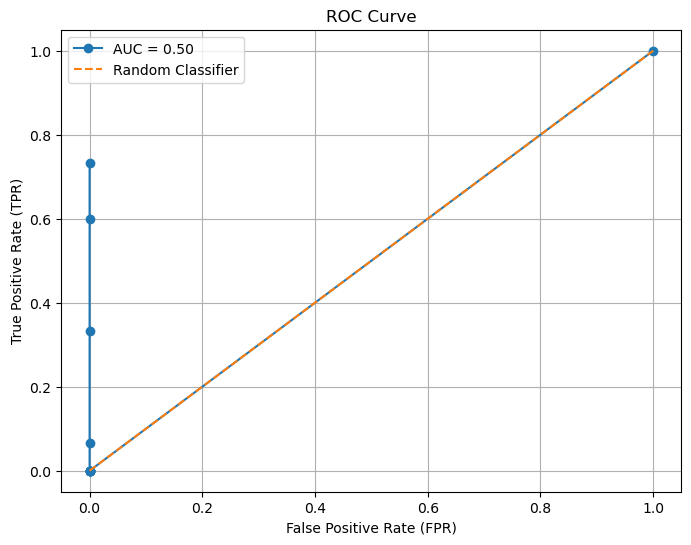

In [511]:
# TODO: Test the plotting function on the TPR and FPR you just calculated.
plot_ROC(TPR, FPR)

## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.


### 10) Cross-validation loop


In [512]:
from sklearn.utils import shuffle

def cross_validation(data, folds=10, threshold_stepsize=0.1):
    # Shuffle the data to ensure randomness
    data = shuffle(data, random_state=42)
    
    # Split the data into folds
    fold_size = len(data) // folds
    results = {
        "AUCs": [],
        "accuracies": [],
        "TPRs": [],
        "FPRs": []
    }

    for i in range(folds):
        # Create train and test sets for the current fold
        test = data[i * fold_size: (i + 1) * fold_size]
        train = np.vstack([data[:i * fold_size], data[(i + 1) * fold_size:]])
        
        # Split train and test into features and labels
        train_features, train_labels = class_split(train)
        test_features, test_labels = class_split(test)
        
        # Calculate feature statistics for each class
        feature_stats = []
        for cls in np.unique(train_labels):
            feature_stats.append(calculate_feature_statistics(train_features[train_labels == cls]))
        
        # Predict probabilities for the test set
        all_probabilities = [
            naive_bayes_prediction(feature_stats, sample) for sample in test_features
        ]
        predicted_classes = [probabilities_to_prediction(probs) for probs in all_probabilities]
        
        # Calculate AUC, TPR, and FPR
        positive_class_probabilities = [prob[1] for prob in all_probabilities]
        TPR, FPR = TPR_and_FPR(np.array(positive_class_probabilities), test_labels, threshold_stepsize)
        auc = np.trapz(TPR, FPR)
        
        # Calculate accuracy
        accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
        
        # Store results
        results["AUCs"].append(auc)
        results["accuracies"].append(accuracy)
        results["TPRs"].append(TPR)
        results["FPRs"].append(FPR)
    
    # Compute mean ROC curve
    mean_TPR = np.mean(results["TPRs"], axis=0)
    mean_FPR = np.mean(results["FPRs"], axis=0)

    # Plot the average ROC curve
    plot_ROC(mean_TPR, mean_FPR)
    
    # Return aggregated results
    return {
        "mean_AUC": np.mean(results["AUCs"]),
        "mean_accuracy": np.mean(results["accuracies"]),
        "AUCs": results["AUCs"],
        "accuracies": results["accuracies"]
    }


### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

- Iris-setosa vs Iris-versicolor
- Iris-setosa vs Iris-virginica
- Iris-versicolor vs Iris-virginica



Cross-validation for class 0 vs class 1
AUC: 0.5


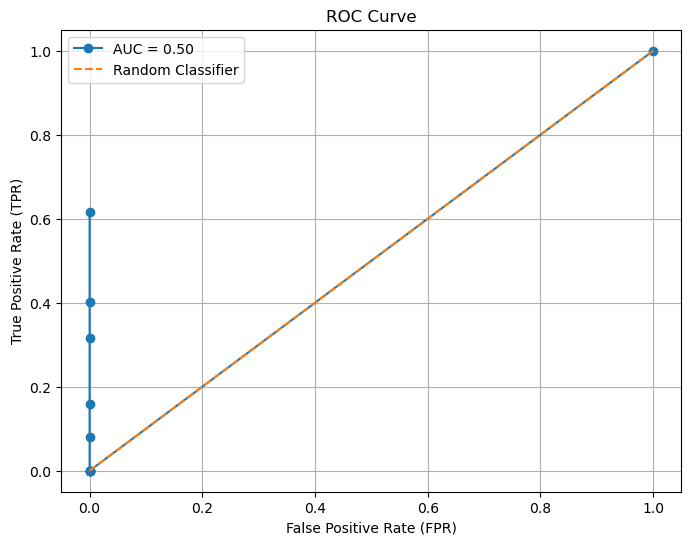

Mean AUC: -0.81
Mean Accuracy: 1.00

Cross-validation for class 0 vs class 2
AUC: 0.5


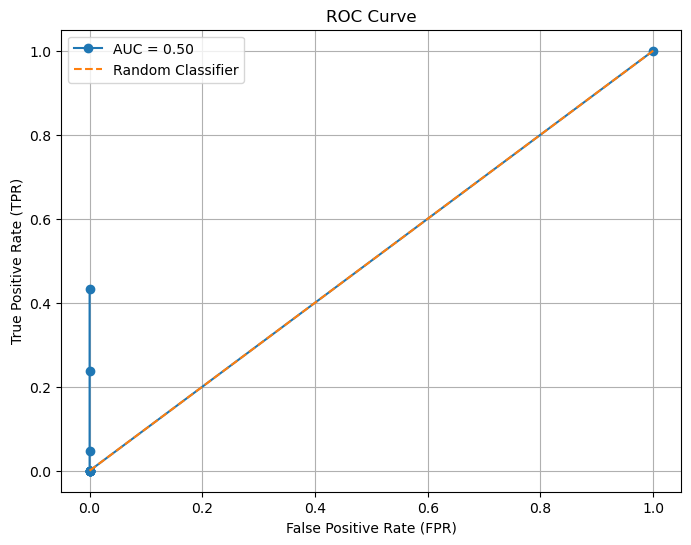

Mean AUC: -0.72
Mean Accuracy: 1.00

Cross-validation for class 1 vs class 2
AUC: 0.7095238095238096


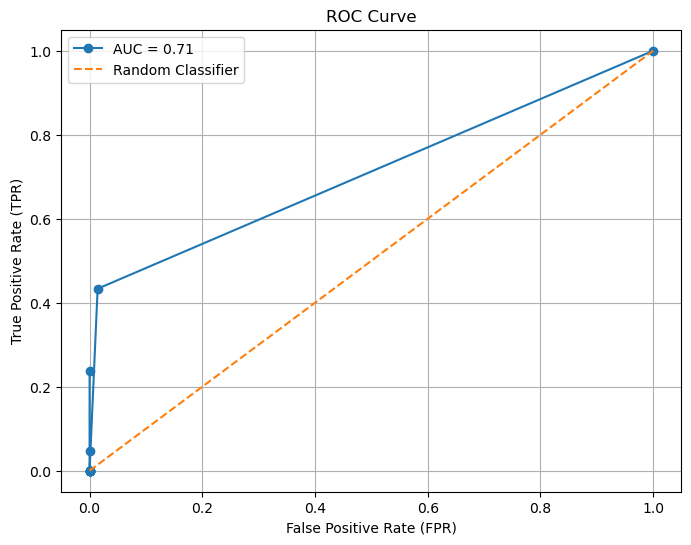

Mean AUC: -0.71
Mean Accuracy: 0.93


In [513]:
# TODO: Implement and test cross-validation function on all classes.
# Prepare binary class datasets for testing
def filter_binary_classes(data, class_a, class_b):
    binary_data = data[np.isin(data[:, -1], [class_a, class_b])]
    binary_data[:, -1] = np.where(binary_data[:, -1] == class_a, 0, 1)  # Map class_a -> 0, class_b -> 1
    return binary_data

# Test on all pairs
class_pairs = [
    (0, 1),  # Iris-setosa vs Iris-versicolor
    (0, 2),  # Iris-setosa vs Iris-virginica
    (1, 2)   # Iris-versicolor vs Iris-virginica
]

for class_a, class_b in class_pairs:
    print(f"\nCross-validation for class {class_a} vs class {class_b}")
    binary_data = filter_binary_classes(data, class_a, class_b)
    results = cross_validation(binary_data, folds=10, threshold_stepsize=0.1)
    print(f"Mean AUC: {results['mean_AUC']:.2f}")
    print(f"Mean Accuracy: {results['mean_accuracy']:.2f}")
